<a href="https://colab.research.google.com/github/SANDESHAHAHA/Data-science2/blob/main/BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BERT (Bidirectional Encoder Representations from Transformers) is a pre-trained NLP model developed by Google in 2018. It's designed to understand the context of words in a sentence more effectively than previous models.**

-BERT reads text bidirectionally—both left-to-right and right-to-left—which helps it understand meaning based on context better than traditional left-to-right models.

-Bert can generate embeddings for the entire senetence .

-Usually BERT generates the vector of size 768

-BERT was trained on wikipedia and nearly on 800M books.

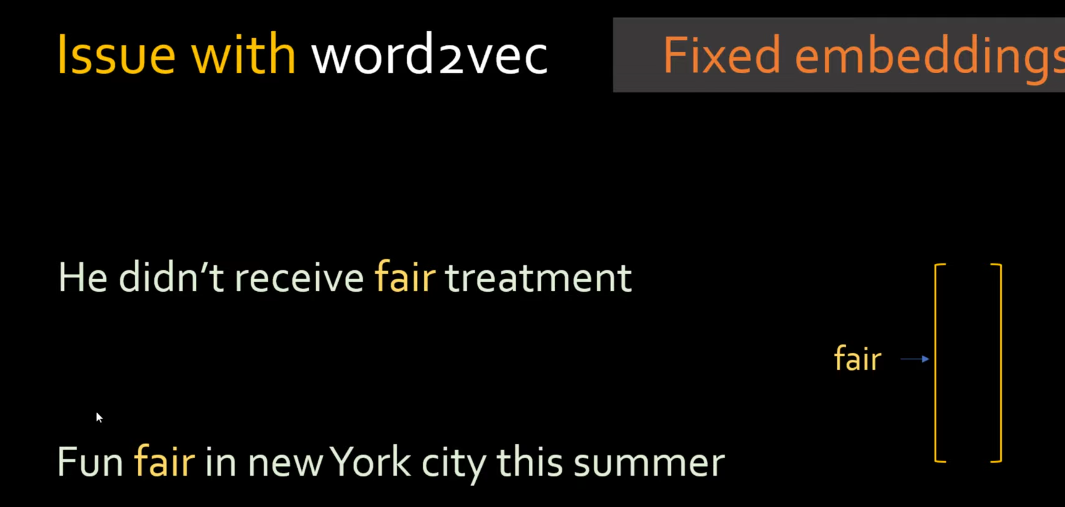

*In the above example word-to-vec gives the same word embeddings in both cases but actually the weights should be differ as the word fair carries different meanings in both the sentences.*

In [1]:
!pip uninstall tensorflow
!pip install tensorflow

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.11/dist-packages/tensorflow-2.18.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/tensorflow/*
Proceed (Y/n)? y
y
Y
mmhg
n
  Successfully uninstalled tensorflow-2.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 94.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installatio

In [2]:
!pip install tensorflow_text



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 94.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.18.1 which is incompatible.


In [3]:
import tensorflow as tf
print(tf.__version__)
import tensorflow_text as text
#Note that for preprocessor to work utf sth encoding is done and without you import above line the prerpocessor instance doesn't gonna work at all .

2.18.1


In [4]:
import tensorflow_hub as hub
preprocessor=hub.KerasLayer("https://kaggle.com/models/tensorflow/bert/TensorFlow2/en-uncased-preprocess/3")
encoder=hub.KerasLayer("https://kaggle.com/models/tensorflow/bert/TensorFlow2/en-uncased-l-12-h-768-a-12/3",trainable=True)



In [5]:
sample_texts=["Hello how are you? ","I love machine learning !"]

preprocessed_text=preprocessor(sample_texts)
preprocessed_text.keys()


dict_keys(['input_type_ids', 'input_mask', 'input_word_ids'])

**Input_word_ids:**

A tensor containing the token IDs for the input text, mapped to the BERT vocabulary. These IDs represent the tokenized words or subwords (using WordPiece tokenization).

Example:

*For the text "Hello, how are you?", this might look like [101, 7592, 1010, 2129, 2024, 2017, 1029, 102, 0, ...], where 101 is [CLS], 102 is [SEP], and 0 is padding.*

**Input Mask :** A tensor indicating which tokens are real (1) versus padding (0).

Example:
*For the same text, it might be [1, 1, 1, 1, 1, 1, 1, 1, 0, ...], where 1 corresponds to actual tokens and 0 to padding*

**Input_type_ids :** A tensor indicating segment IDs to differentiate between different parts of the input (e.g., sentence A vs. sentence B in tasks like question answering). For single-sentence inputs, this is typically all zeros.

Example:
*For a single sentence, it’s usually [0, 0, 0, ..., 0]. For paired inputs (e.g., question + answer), it might alternate between 0 (for the first segment) and 1 (for the second segment).*

In [6]:
preprocessed_text['input_mask']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

Note that in maksing there are two more than the real input identifiers (denoted by 1) to identify two more tokes viz. **CLS and SEP**

In [7]:
preprocessed_text['input_type_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

Above all are zeros since both are indepenedent sentences Sentence A and sentence B

In [8]:
preprocessed_text['input_word_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[ 101, 7592, 2129, 2024, 2017, 1029,  102,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [ 101, 1045, 2293, 3698, 4083,  999,  102,    0,    0,    0,    0,
           0,

In [10]:
bert_results=encoder(preprocessed_text)
bert_results.keys()

dict_keys(['pooled_output', 'sequence_output', 'encoder_outputs', 'default'])

In [11]:
bert_results['pooled_output']

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.93801796, -0.43078578, -0.889243  , ..., -0.74102235,
        -0.74390435,  0.9450963 ],
       [-0.8850445 , -0.38733977, -0.5590383 , ..., -0.48374388,
        -0.69104433,  0.9009189 ]], dtype=float32)>

The two senetences are represented now in form of numbers that are vectors .Which can be used in ner(named entity recognition) ,movie review classification. The 768 length of vectors are very powerful emebeddings created for the sentence.

In [12]:
bert_results['sequence_output']

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[-0.02739487, -0.00114494, -0.17585054, ..., -0.3960641 ,
          0.16195887,  0.5848572 ],
        [ 0.2666781 ,  0.27201468,  0.39755028, ..., -0.5133434 ,
          0.76987636, -0.13009004],
        [-0.38234687, -0.47315583, -0.30807546, ..., -0.22228183,
          0.706833  , -0.6777223 ],
        ...,
        [-0.15653664,  0.12174944,  0.65062517, ..., -0.06932928,
         -0.10900652,  0.09510534],
        [-0.2876027 ,  0.05686784,  0.6688665 , ..., -0.03761462,
         -0.13821727,  0.06479266],
        [-0.1496618 ,  0.01657673,  0.69110966, ...,  0.03559511,
         -0.04480506, -0.03616022]],

       [[ 0.21996975,  0.2647228 ,  0.0406032 , ..., -0.21113828,
          0.18356943,  0.36259118],
        [ 0.59055483,  0.16472405, -0.24739137, ..., -0.13044672,
          0.5702489 ,  0.40127993],
        [ 1.0365047 ,  1.080938  ,  0.62809753, ..., -0.17597473,
          0.7211688 ,  0.15070224],
        ...,

It is the last hidden state where the size is (2,128,768)
each units either words from sentence or sep or cls will have lenght of 768 vectors and paddinggs of **length of tokens + 2 i.e cls and sep** are generated . In the sequence output even the padding will be embedded with certain vector since it is contextual embedding method.

**The encoded output is the output of all 12 encoded layers. and the last layers is same as the sequence output.**

In [13]:
len(bert_results['encoder_outputs'])

12